REF:  
[機器學習專案] Kaggle競賽-鐵達尼號生存預測(Top 3%)  
https://medium.com/@yulongtsai/https-medium-com-yulongtsai-titanic-top3-8e64741cc11f  
Python决策树模型做 Titanic数据集预测并可视化（一）  
https://zhuanlan.zhihu.com/p/32878359  
  
PassengerId：乘客ID  
Pclass：艙等  
Name：乘客姓名  
Sex：性别  
Age：年齡  
SibSp：堂兄弟/妹數  
Parch：父母&小孩數  
Ticket：船票資訊  
Fare ：票價  
Cabin：客艙編號  
Embarked： 登船港口  

In [1]:
import os
print(os.listdir("../input"))
# Any results you write to the current directory are saved as output.
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
sns.set(font_scale=1.56)
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold, learning_curve, train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFECV
# loading data
df_train = pd.read_csv("../input/train.csv")
df_test = pd.read_csv("../input/test.csv")
df_data = df_train.append(df_test)#合併train&test
df_data.reset_index(inplace=True, drop=True)#reset index(防止index重複問題)
# for display dataframe
from IPython.display import display
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)
# ignore warning
import warnings
warnings.filterwarnings("ignore")

['train.csv', 'gender_submission.csv', 'test.csv']


/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [2]:
df_data

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.0,17463
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1.0,347742
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1.0,237736


In [3]:
print(df_train.head())
print(df_train.info())

   PassengerId  Survived  Pclass    ...        Fare Cabin  Embarked
0            1         0       3    ...      7.2500   NaN         S
1            2         1       1    ...     71.2833   C85         C
2            3         1       3    ...      7.9250   NaN         S
3            4         1       1    ...     53.1000  C123         S
4            5         0       3    ...      8.0500   NaN         S

[5 rows x 12 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory 

In [4]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


,Sex,Survived
0,female,0.742
1,male,0.189


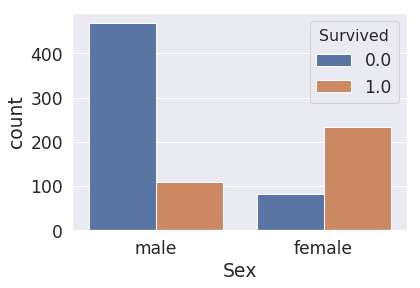

In [5]:
sns.countplot(df_data['Sex'], hue=df_data['Survived'])
display(df_data[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().round(3))

,Pclass,Survived
0,1,0.630
1,2,0.473
2,3,0.242


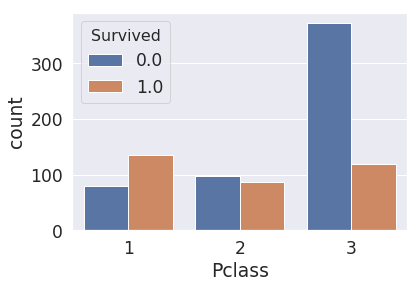

In [6]:
sns.countplot(df_data['Pclass'], hue=df_data['Survived'])
df_data[["Pclass", "Survived"]].groupby(['Pclass'], as_index=False).mean().round(3)

In [7]:
df_train.Age.fillna(df_train.Age.mean(),inplace=True) 

In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(df_train['Sex'])
df_train['Sex']=le.transform(df_train['Sex'])
print(df_train.Sex)

0      1
1      0
2      0
3      0
4      1
5      1
6      1
7      1
8      0
9      0
10     0
11     0
12     1
13     1
14     0
15     0
16     1
17     1
18     0
19     0
20     1
21     1
22     0
23     1
24     0
25     0
26     1
27     1
28     0
29     1
      ..
861    1
862    0
863    0
864    1
865    0
866    0
867    1
868    1
869    1
870    1
871    0
872    1
873    1
874    0
875    0
876    1
877    1
878    1
879    0
880    0
881    1
882    0
883    1
884    1
885    0
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int64


In [9]:
features=['Pclass','Sex','Age']
X=df_train[features]
y=df_train['Survived']
dt=tree.DecisionTreeClassifier()
score=cross_val_score(dt,X,y,cv=5,scoring='accuracy')
import numpy as np
print(np.mean(score))

0.801416348114237


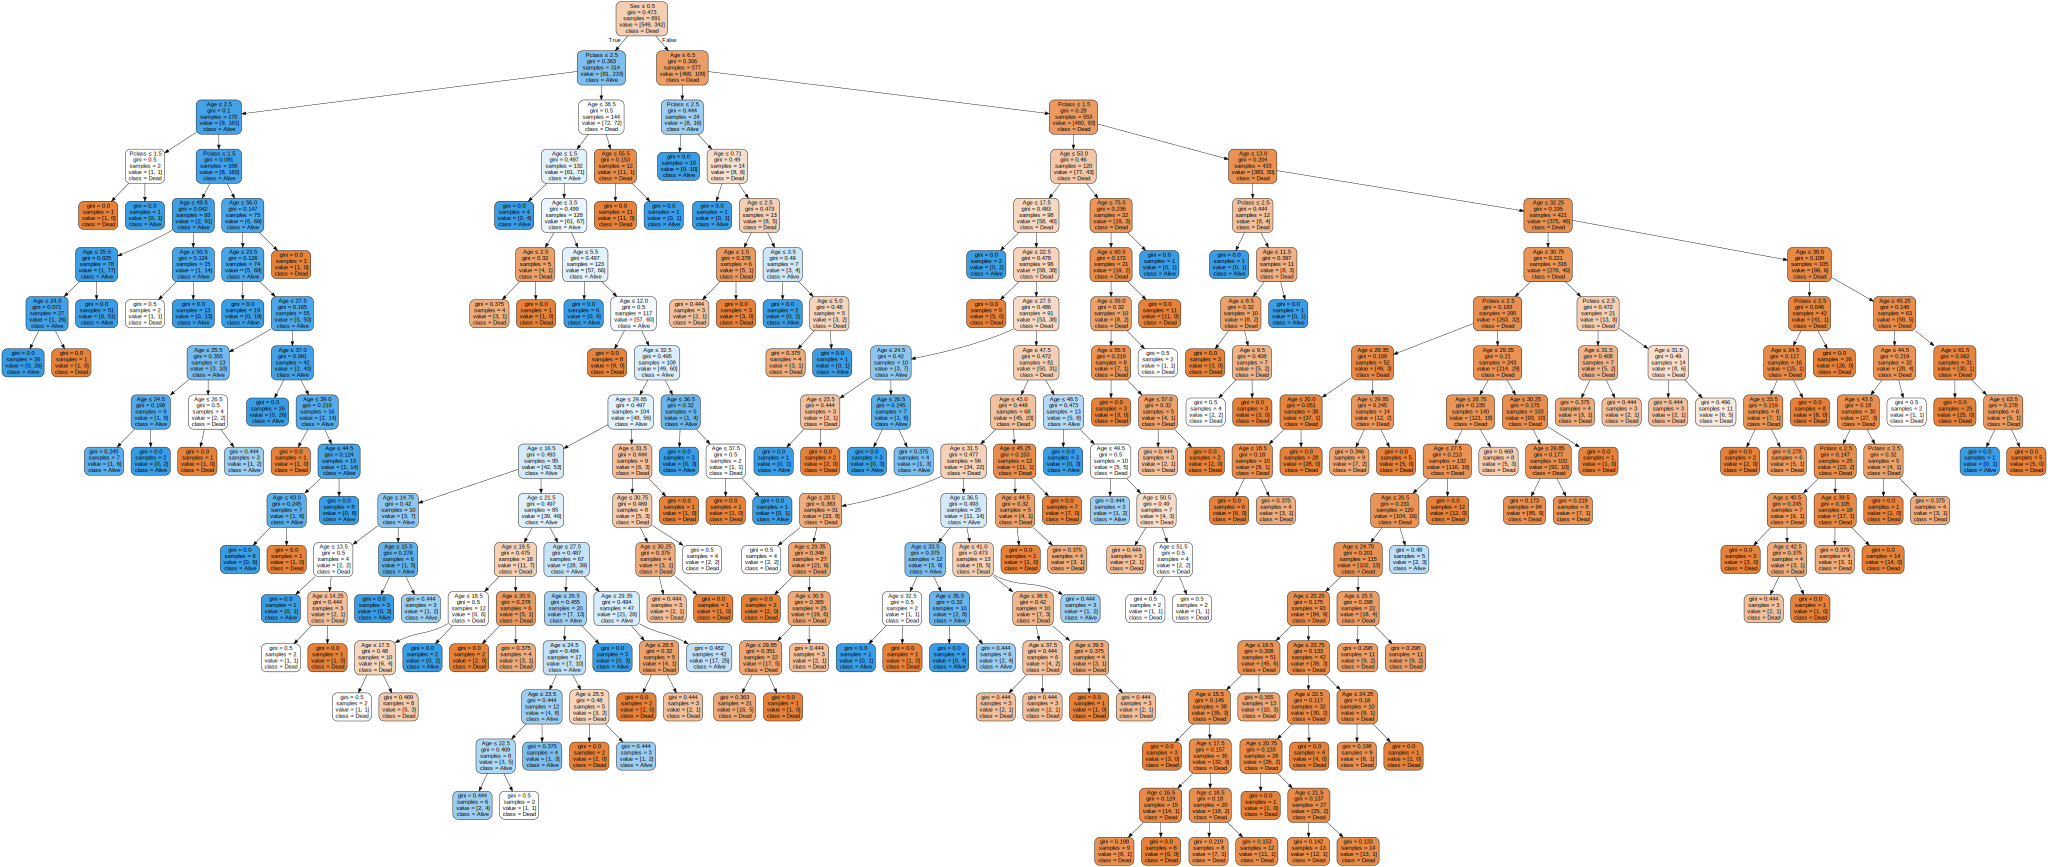

In [10]:
import graphviz
dt.fit(X,y)
from sklearn.tree import export_graphviz  
f=export_graphviz(dt,feature_names=['Pclass','Sex','Age'],
    class_names = ['Dead', 'Alive'],
    out_file=None,filled=True,
    rounded=True,
    special_characters=True)
graph = graphviz.Source(f)
graph

In [11]:
# Inputs set and labels
X = df_train.drop(labels=['Survived','PassengerId'],axis=1)
Y = df_train['Survived']

In [12]:
# Show Baseline
Base = ['Pclass','Sex','Age','SibSp','Parch']
Base_Model = RandomForestClassifier(random_state=2,n_estimators=250,min_samples_split=20,oob_score=True)
Base_Model.fit(X[Base], Y)
print('Base oob score :%.5f' %(Base_Model.oob_score_))

Base oob score :0.80808


In [13]:
test=pd.read_csv('../input/test.csv')
test.Age.fillna(test.Age.mean(),inplace=True) 
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(test['Sex'])
#用离散值转化标签值
test['Sex']=le.transform(test['Sex'])
X_test=test[features]
result=dt.predict(X_test)
test.insert(1,'Survived',result)
final=test.iloc[:,0:2]

In [14]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": result
    })
#submission.to_csv('../output/submission.csv', index=False)

Sex,female,male,All
AgeNan,,,
0,78,185,263
1,388,658,1046
All,466,843,1309


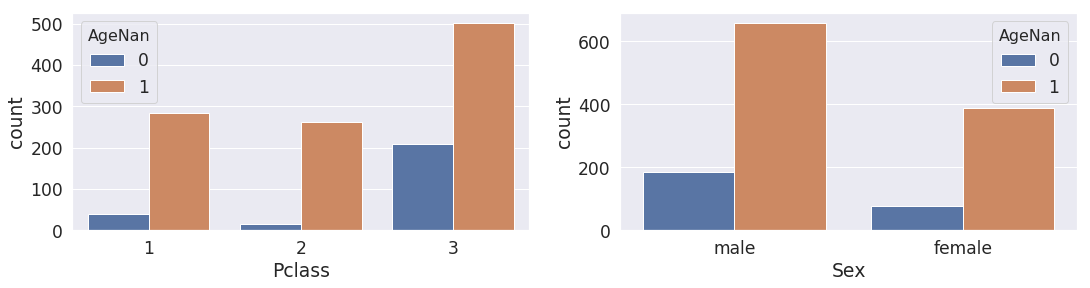

In [16]:
df_data['AgeNan'] = df_data['Age'].isnull().map(lambda x : 0 if x == True else 1)
fig, [ax1, ax2] = plt.subplots(1, 2)
fig.set_figwidth(18)
ax1 = sns.countplot(df_data['Pclass'],hue=df_data['AgeNan'],ax=ax1)
ax2 = sns.countplot(df_data['Sex'],hue=df_data['AgeNan'],ax=ax2)
pd.crosstab(df_data['AgeNan'],df_data['Sex'],margins=True).round(3)

In [ ]:
Mask_Has_Age_P12_Survived = ( (df_data.Has_Age == 1) & (df_data.Pclass != 3 ) & (df_data.Survived == 1) )
Mask_Has_Age_P12_Dead = ( (df_data.Has_Age == 1) & (df_data.Pclass != 3 ) & (df_data.Survived == 0) )
# Plot
fig, ax = plt.subplots( figsize = (15,9) )
ax = sns.distplot(df_data.loc[Mask_Has_Age_P12_Survived, 'Age'],kde=False,bins=10,norm_hist=True,label='Survived') 
ax = sns.distplot(df_data.loc[Mask_Has_Age_P12_Dead, 'Age'],kde=False,bins=10,norm_hist=True,label='Dead')
ax.legend()
ax.set_title('Age vs Survived in Pclass = 1 and  2',fontsize = 20)

Text(0.5,1,'Age vs Survived in Pclass = 1 and  2')